## Classification 

### 1. pre-process the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [7]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [8]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'income'}>]], dtype=object)

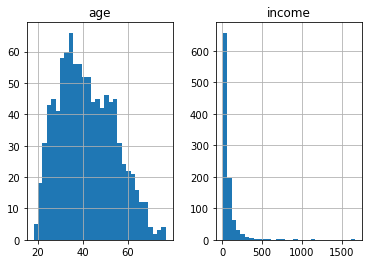

In [20]:
df.hist(column = ['age', 'income'], bins = 30)

In [21]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]
x.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [23]:
y = df['custcat'].values
y[0:4]

array([1, 4, 3, 1], dtype=int64)

### 2. Normalize data

In [31]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
# data standardization 
scaler = StandardScaler()
x_norm = scaler.fit_transform(x.astype(float))
x_norm[0:4]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794]])

### 3. Train test split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x_norm, y, test_size = 0.2, random_state = 0)
print('number of train samples: ', x_train.shape[0])
print('number of test samples: ', len(x_test))

number of train samples:  800
number of test samples:  200


### 4. K_nearest neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
k = 4
#  train model and predict 
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [52]:
yhat_k4 = neigh.predict(x_test)
yhat_k4[0:4]

array([3, 1, 2, 4], dtype=int64)

#### Accuracy evaluation

In [53]:
from sklearn import metrics

In [57]:
# jaccard_score function
train_score = metrics.accuracy_score(y_train, neigh.predict(x_train))
test_score = metrics.accuracy_score(y_test, yhat_k4)
print('Train set score: ', train_score)
print('Test set score:', test_score)

Train set score:  0.58
Test set score: 0.295


In [87]:
ks = 10

for n in range (1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    test_score = metrics.accuracy_score(y_test, yhat)
    print('k = ', n)
    print('test_score=', test_score)


k =  1
test_score= 0.23
k =  2
test_score= 0.26
k =  3
test_score= 0.28
k =  4
test_score= 0.295
k =  5
test_score= 0.32
k =  6
test_score= 0.31
k =  7
test_score= 0.34
k =  8
test_score= 0.34
k =  9
test_score= 0.325


In [91]:
# calculate the accuracy of KNN

ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range (1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    print('k = ', n)
    print('test_score=', mean_acc[n-1])
    

k =  1
test_score= 0.23
k =  2
test_score= 0.26
k =  3
test_score= 0.28
k =  4
test_score= 0.295
k =  5
test_score= 0.32
k =  6
test_score= 0.31
k =  7
test_score= 0.34
k =  8
test_score= 0.34
k =  9
test_score= 0.325


In [73]:
k = 5
neigh_k5 = KNeighborsClassifier(n_neighbors = 5).fit(x_train,y_train)
neigh_k5

KNeighborsClassifier()

In [74]:
# train accuracy score when k = 5
metrics.accuracy_score(y_train,neigh_k5.predict(x_train))

0.5625

In [75]:
# test accuracy score when k = 5
metrics.accuracy_score(y_test,neigh_k5.predict(x_test))

0.32

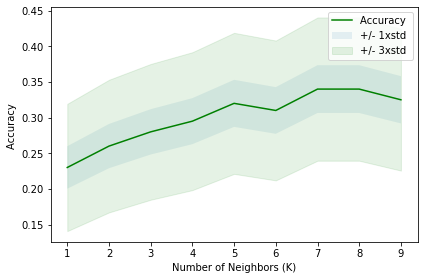

In [92]:
#plot the model accuracy for a different number of neighbors
ks = 10


plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()